In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
file = '/Users/peytonnash/Documents/university_of_chicago/02_wint_25/adsp_31017/project/archive/train_data.csv'
df = pd.read_csv(file)

/var/folders/mf/8c9q6j514k1_fgpgs5221sch0000gn/T/ipykernel_91764/2147340280.py:2: DtypeWarning: Columns (9,12,13,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [4]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ChronicCount,PotentialFraud,ClaimType
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,82,7,Yes,Inpatient
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,36000,3204,60,70,82,7,No,Inpatient
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,82,7,No,Inpatient
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,111,6,No,Inpatient
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,2,21260,2136,120,100,87,5,No,Inpatient


In [37]:
n_miss = pd.DataFrame(df.isna().sum(), columns=['n_miss']).sort_values(by = 'n_miss').iloc[-15:]

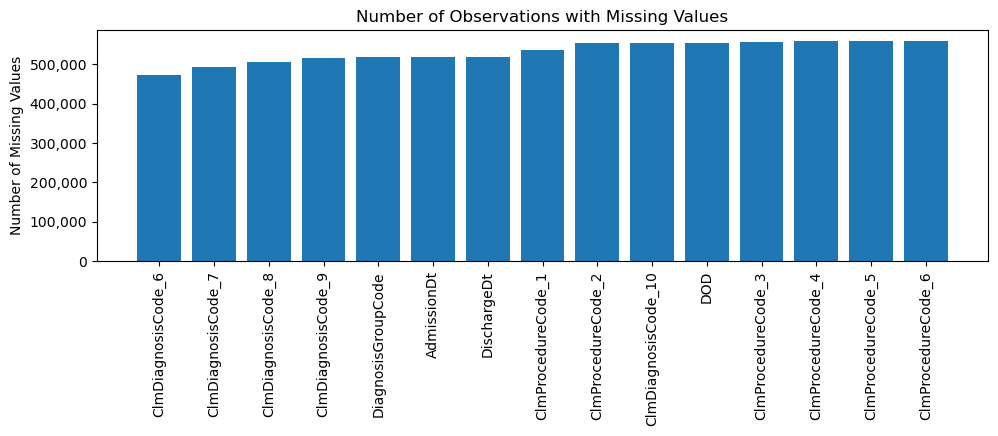

In [90]:
plt.figure(figsize=(11.5,3))
plt.title('Number of Observations with Missing Values')
plt.bar(n_miss.index, height=n_miss['n_miss'])
plt.xticks(rotation = 90)
plt.ylabel('Number of Missing Values')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

In [48]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'TotalClaims', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressio

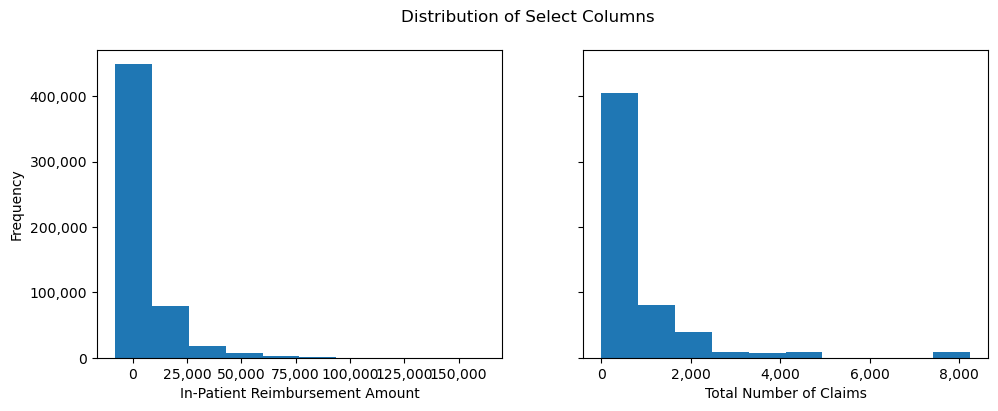

In [96]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (11.5, 4), sharey=True)
fig.suptitle('Distribution of Select Columns')
axs[0].hist(df['IPAnnualReimbursementAmt'])
axs[0].set_xlabel('In-Patient Reimbursement Amount')
axs[0].set_ylabel('Frequency')
axs[1].hist(df['TotalClaims'])
axs[1].set_xlabel('Total Number of Claims')

for ax in axs:
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

In [68]:
df['IPAnnualReimbursementAmt'].max()

161470

In [74]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'TotalClaims', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressio

In [75]:
df['PotentialFraud'].value_counts()

PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64

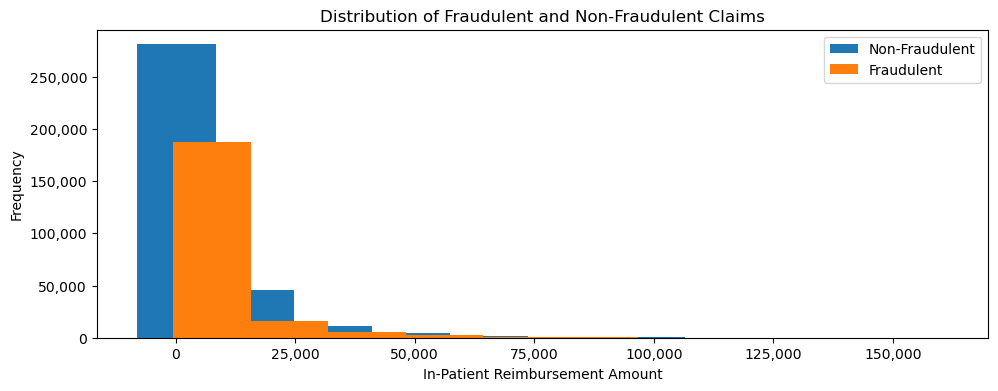

In [ ]:
plt.figure(figsize=(11.5, 4))
plt.title('Distribution of Fraudulent and Non-Fraudulent Claims')
plt.hist(df['IPAnnualReimbursementAmt'][df['PotentialFraud'] == 'No'], label='Non-Fraudulent')
plt.hist(df['IPAnnualReimbursementAmt'][df['PotentialFraud'] == 'Yes'], label='Fraudulent')
plt.xlabel('In-Patient Reimbursement Amount')
plt.ylabel('Frequency')
plt.legend()

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()